# Importing the necessary packages

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
import cv2
from scipy import stats
from tensorflow.keras.utils import to_categorical

2023-02-25 17:27:43.207921: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-25 17:27:43.548343: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ivana/.pyenv/versions/3.10.6/envs/braintumorclassification/lib/python3.10/site-packages/cv2/../../lib64:
2023-02-25 17:27:43.548369: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-25 17:27:45.097032: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not 

# Upload the data with Victors Function

In [2]:
Directory='../raw_data'

In [3]:
def load_data(Directory):
    '''Returns: X_train, y_train, X_test, y_test. Loads data from data directory into np.arrays. Make sure, your directory is structured as the downloaded folder.
    Provide the relative path to this folder as Directory argument.'''

    X_train, y_train = [], []
    X_test, y_test = [], []

    ### load training data
    directories_training = {}
    target = 0

    for foldername in os.listdir(f'{Directory}/Training'):
        directories_training[foldername] = f'{Directory}/Training/{foldername}'

    for tumor_directory in directories_training.values():
        for filename in os.listdir(tumor_directory):
            breakpoint()
            filepath = os.path.join(tumor_directory, filename)
            picture = cv2.imread(filepath)[:,:,:1]
            picture_resized = cv2.resize(picture, (255,255))
            X_train.append(picture_resized)
            y_train.append(target)
        target += 1

    ### shuffle data
    c = list(zip(X_train, y_train))
    np.random.shuffle(c)
    X_train, y_train = zip(*c)

    ### format data to array
    X_train = np.array(X_train)
    X_train = np.expand_dims(X_train, axis=3)
    y_train = np.array(y_train)
    print(f'X_train and y_train created successfully with shapes: \n X_train:{X_train.shape}\n y_train:{y_train.shape}')

    ### load testing data
    directories_testing = {}
    target = 0

    for foldername in os.listdir(f'{Directory}/Testing'):
        directories_testing[foldername] = f'{Directory}/Testing/{foldername}'

    for tumor_directory in directories_testing.values():
        for filename in os.listdir(tumor_directory):
            filepath = os.path.join(tumor_directory, filename)
            picture = cv2.imread(filepath)[:,:,:1]
            picture_resized = cv2.resize(picture, (255,255))
            X_test.append(picture_resized)
            y_test.append(target)
        target += 1

    ### shuffle data
    c = list(zip(X_test, y_test))
    np.random.shuffle(c)
    X_test, y_test = zip(*c)

    ### format data to array
    X_test = np.array(X_test)
    X_test = np.expand_dims(X_test, axis=3)
    y_test = np.array(y_test)
    print(f'X_test and y_test created successfully with shapes: \n X_test:{X_test.shape}\n y_train:{y_test.shape}')

    return X_train, y_train, X_test, y_test


In [4]:
X_train, y_train, X_test, y_test = load_data(Directory)

X_train and y_train created successfully with shapes: 
 X_train:(2870, 255, 255, 1)
 y_train:(2870,)
X_test and y_test created successfully with shapes: 
 X_test:(394, 255, 255, 1)
 y_train:(394,)


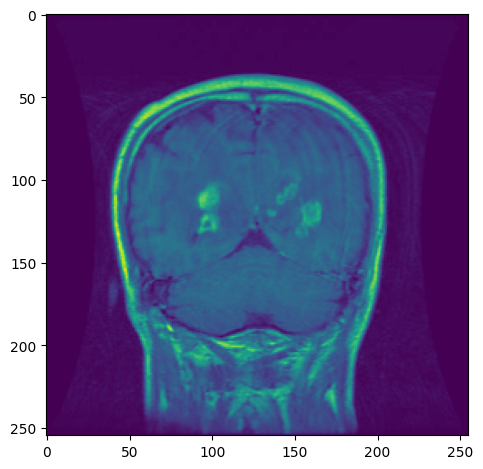

In [5]:
for i in range(4):
    plt.imshow(X_train[i])
plt.tight_layout()
plt.show()

# Normalizing the data

In [6]:
X_train_norm = X_train/255
X_test_norm = X_test/255

# To_category Encoding

In [7]:
### Encoding the labels
from tensorflow.keras.utils import to_categorical
y_train_enc = to_categorical(y_train, 4)

y_test_enc = to_categorical(y_test, 4)


# Initialize the model with the function

In [8]:
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

def initialize_model():
    
    model = Sequential()
    
    model.add(Conv2D(16, (3, 3), activation = 'relu', padding = 'same', input_shape=(255, 255, 1)))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Dropout(0.2))
    
    model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Dropout(0.2))
    
    model.add(Conv2D(64, (2, 2), activation = 'relu', padding = 'same'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(100, activation = 'relu'))
    model.add(Dropout(0.4))
    model.add(Dense(4, activation = 'softmax'))
    
    return model

In [9]:
model = initialize_model()
model.summary()

2023-02-25 17:28:00.693576: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ivana/.pyenv/versions/3.10.6/envs/braintumorclassification/lib/python3.10/site-packages/cv2/../../lib64:
2023-02-25 17:28:00.693652: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-25 17:28:00.693714: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-BAN40P0): /proc/driver/nvidia/version does not exist
2023-02-25 17:28:00.694513: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operati

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 255, 255, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 127, 127, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 63, 63, 32)        0

In [10]:
from tensorflow.keras import optimizers

def compile_model(model):
    model.compile(loss = 'categorical_crossentropy',
                  optimizer = 'adam',
                  metrics = ['accuracy'])
    return model

In [11]:
compile_model(model)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience = 5, verbose = 2)

history = model.fit(X_test_norm, y_train_enc, 
                    validation_split = 0.3,
                    callbacks = [es], 
                    epochs = 100, 
                    batch_size = 64)

Epoch 1/100


2023-02-25 17:28:04.385882: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 266342400 exceeds 10% of free system memory.
